<a href="https://colab.research.google.com/github/SUBHASH-KANDHWAY/MACHINE-LEARNING-PROJECTS/blob/master/BOARD_GAME_PREDICTION_REVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression


In [38]:
games=pd.read_csv('games.csv')
games.head(10)
game=games.drop(['type'], axis=1)

In [39]:
print(game.columns)
print(game.shape)

Index(['id', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 19)


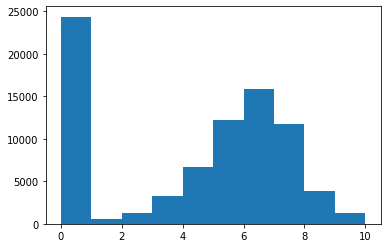

In [40]:
#making histograms
plt.hist(games['average_rating'])
plt.show()

id                             318
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime   

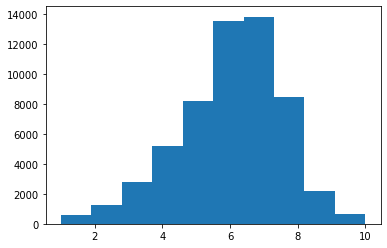

In [41]:
print(game[game['average_rating']==0].iloc[0])
print(game[game['average_rating']>0].iloc[0])
game=game[game['users_rated']>0]
game=game.dropna(axis=0)
plt.hist(game['average_rating'])
plt.show()

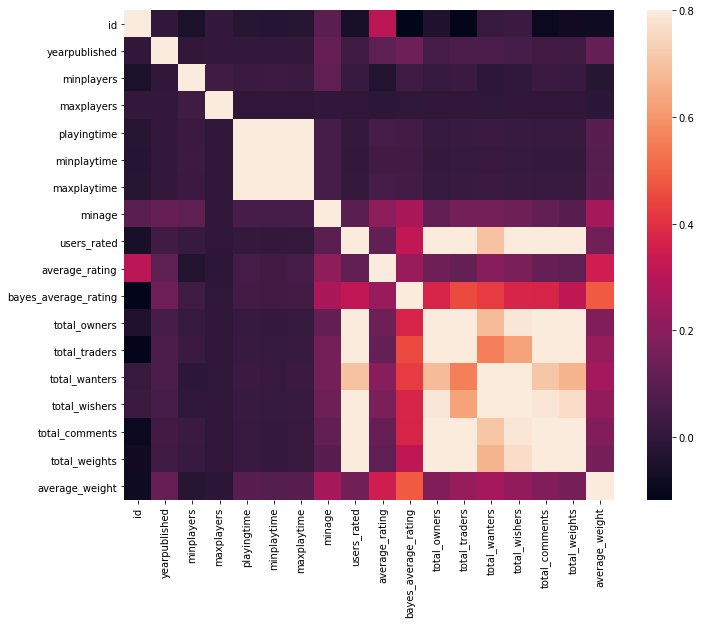

In [42]:
#correlationMatrix
cormat=game.corr()
fig=plt.figure(figsize=(12,9))
sea.heatmap(cormat,vmax=.8,square=True)
plt.show()

In [43]:
#get all the column from dataframe
columns=game.columns.to_list()
columns=[c for c in column if c not in['bayes_average_rating','average_rating','types','name','id']]
#storing the variable we r predictiong
target='average_rating'

In [47]:
from sklearn.model_selection import train_test_split
# Generate the training set.  Set random_state to be able to replicate results.
train = game.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = game.loc[~game.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 19)
(11379, 19)


In [ ]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

In [ ]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])